In [2]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation#, cross_validation_auto
import pickle as pkl

In [30]:
# list of parameters to generate different kind of datasets

states = [2, 4, 8, 12]
dims = [10, 15, 20, 30, 100]
mode_prec = ['complementary']
mode_mea = ['Normal']


alpha_list = np.logspace(-1, 1, 3)
clusters_list = np.arange(2,15)

In [ ]:
for st in states:
    for dim in dims:
        for mp in mode_prec:
            for mm in mode_mea:
                
                # Generate a dataset
                dataset = generate_hmm(n_samples=1000, n_states=st, n_dim_obs=dim,
                       mode_precisions=mp,mode_mean = mm, transition_type='fixed', sigma=1)
                
                print('Case: N_states:',st,',TS dim:',dim,',Prec mode:',mp,',Mean mode:',mm)
                
                # HMM_GraphicalLasso with a given alpha 
                mdl = HMM_GraphicalLasso(alpha=2, n_clusters=5, verbose=False, mode='scaled',
                                         warm_restart=True, repetitions=3,n_jobs=-1)
                
                #CV
                res = ((st,dim,mp,mm),
                       cross_validation(mdl, dataset['data'], 
                                                       params={'alpha':alpha_list,
                                                       'n_clusters':clusters_list},
                                                         mode='bic', n_repetitions=3)[0],
                      dataset)
                
#                 # HMM_GraphicalLasso with auto generated alpha 
                
#                 mdl = HMM_GraphicalLasso(alpha=2, n_clusters=5, verbose=False, mode='scaled',mode_lam ='auto',
#                                          warm_restart=True, repetitions=3,n_jobs=-1)
                
#                 #CV
#                 res_1 = ((st,dim,mp,mm),cross_validation_auto(mdl, dataset['data'],
#                             params={'n_clusters':clusters_list},mode='stability', n_repetitions=3))
                
#                 with open('one_shot_results_'+st+'states_'+dim+'dimensions_'+mp+'precisiontype_'+mm+'meantype.pkl', wb) as f:
#                     pkl.dump([res, res_1], f)

/home/vero/git_repos/regain/regain/datasets/hmm.py:127: RuntimeWarning: covariance is not positive-semidefinite.
  covariances[state], 1)




  0%|          | 0/3 [00:00<?, ?it/s]




  0%|          | 0/13 [00:00<?, ?it/s]

Case: N_states: 2 ,TS dim: 10 ,Prec mode: complementary ,Mean mode: Normal







  8%|▊         | 1/13 [00:44<08:53, 44.45s/it]




 15%|█▌        | 2/13 [04:54<19:28, 106.27s/it]




 23%|██▎       | 3/13 [10:22<28:45, 172.59s/it]




 31%|███       | 4/13 [17:08<36:24, 242.68s/it]




 38%|███▊      | 5/13 [25:48<43:27, 325.99s/it]




 46%|████▌     | 6/13 [37:57<52:06, 446.65s/it]




 54%|█████▍    | 7/13 [51:12<55:08, 551.36s/it]




 62%|██████▏   | 8/13 [1:06:06<54:30, 654.02s/it]




 69%|██████▉   | 9/13 [1:23:21<51:13, 768.44s/it]




 77%|███████▋  | 10/13 [1:41:26<43:09, 863.33s/it]




 85%|████████▍ | 11/13 [2:00:05<31:19, 939.91s/it]




 92%|█████████▏| 12/13 [2:19:51<16:53, 1013.79s/it]

In [8]:
res

((5, 15, 'complementary', 'Normal'),
 ((0.1, 2),
  {(0.1,
    2): {'bics': [49141.78910365297,
     49141.78910365297,
     49141.78910365297], 'mean_bic': 49141.78910365297, 'std_bic': 0.0, 'connectivity_matrix': array([[1., 1., 1., ..., 0., 0., 0.],
           [1., 1., 1., ..., 0., 0., 0.],
           [1., 1., 1., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 1., 1., 1.],
           [0., 0., 0., ..., 1., 1., 1.],
           [0., 0., 0., ..., 1., 1., 1.]]), 'dispersion_coefficient': 0.9999123895631262, 'estimators': [HMM_GraphicalLasso(alpha=0.1, init_params={}, max_iter=100, mode='scaled',
               n_clusters=2, n_jobs=-1, repetitions=3, tol=0.0001,
               verbose=False, warm_restart=True),
     HMM_GraphicalLasso(alpha=0.1, init_params={}, max_iter=100, mode='scaled',
               n_clusters=2, n_jobs=-1, repetitions=3, tol=0.0001,
               verbose=False, warm_restart=True),
     HMM_GraphicalLasso(alpha=0.1, init_params={}, max_iter=100, mode=

In [ ]:
with open("./Results.pkl.pkl", "rb") as f:
    res_fede = pkl.load(f)

In [11]:
res_alpha_fede = res[1][1]
couples = []
mean_bic = []
std_bic =[]
dispersion_coeff = []
for k in res_alpha_fede.keys():
    couples.append(k)
    mean_bic.append(res_alpha_fede[k]['mean_bic'])
    std_bic.append(res_alpha_fede[k]['std_bic'])
    dispersion_coeff.append(res_alpha_fede[k]['dispersion_coefficient'])
    

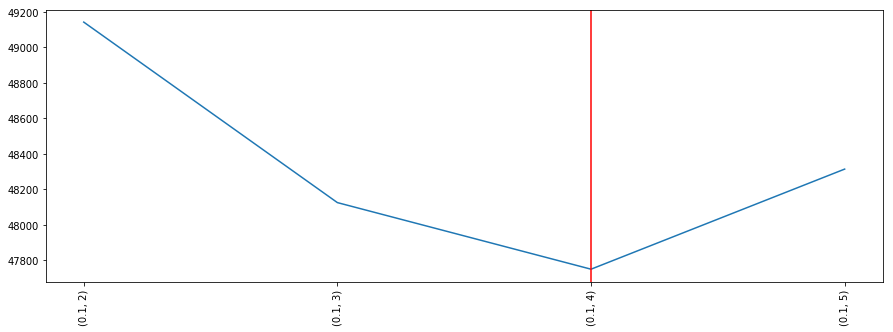

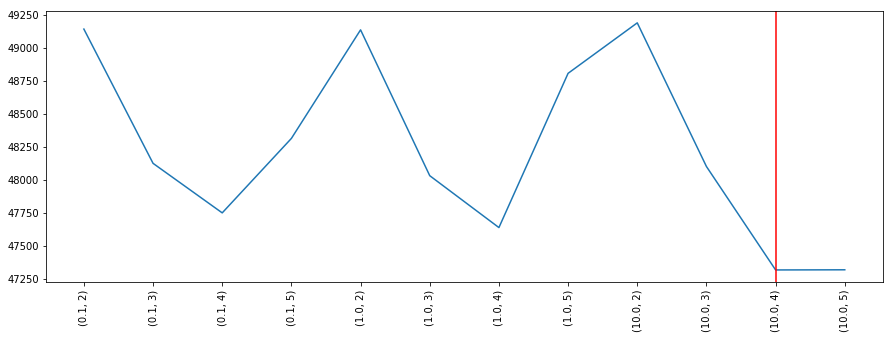

In [17]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.plot(mean_bic[:-8])
plt.fill_between(np.arange(len(mean_bic[:-8])), np.array(mean_bic[:-8])-np.array(std_bic[:-8]),
                 np.array(mean_bic[:-8])+np.array(std_bic[:-8]), alpha=0.3)
plt.axvline(np.argmin(mean_bic[:-8]), color='red')
plt.xticks(np.arange(len(mean_bic[:-8])),couples[:-8], rotation='vertical')
plt.show()
plt.figure(figsize=(15,5))
plt.plot(mean_bic)
plt.fill_between(np.arange(len(mean_bic)), np.array(mean_bic)-np.array(std_bic),
                 np.array(mean_bic)+np.array(std_bic), alpha=0.3)
plt.axvline(np.argmin(mean_bic), color='red')
plt.xticks(np.arange(len(mean_bic)),couples, rotation='vertical')
plt.show()


# plt.figure(figsize=(15,5))
# final_res = np.array(mean_bic[:-8]/np.sum(mean_bic[:-8])) + np.array(dispersion_coeff[:-8])
# plt.plot(final_res)
# plt.axvline(np.argmin(final_res), color='red')
# plt.xticks(np.arange(len(mean_bic[:-8])),couples[:-8], rotation='vertical')
# plt.show()

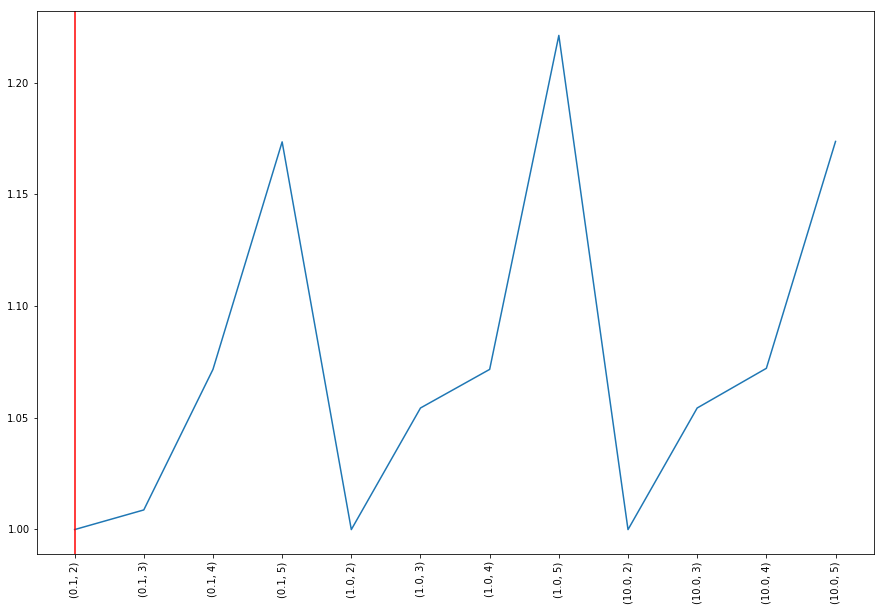

In [13]:
plt.figure(figsize=(15,10))
plt.plot(dispersion_coeff)
plt.axvline(np.argmin(dispersion_coeff), color='red')
plt.xticks(np.arange(len(mean_bic)),couples, rotation='vertical')
plt.show()

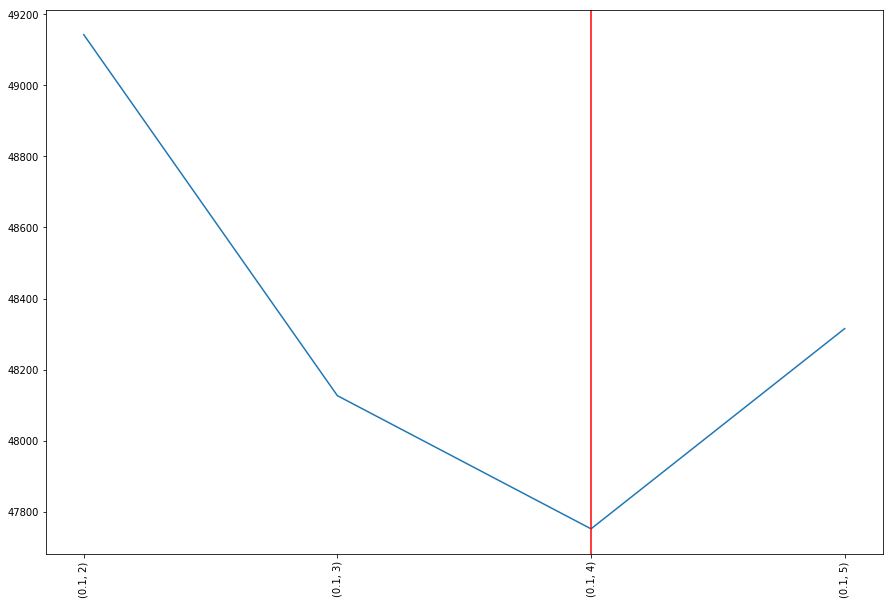

In [14]:
plt.figure(figsize=(15,10))
final_res = np.array(mean_bic[:-8]) + np.array(dispersion_coeff[:-8])
plt.plot(final_res)
plt.axvline(np.argmin(final_res), color='red')
plt.xticks(np.arange(len(mean_bic[:-8])),couples[:-8], rotation='vertical')
plt.show()

In [15]:
res_no_alpha_fede = res_[2][1]
couples = []
mean_bic = []
std_bic =[]
dispersion_coeff = []
for k in res_no_alpha_fede.keys():
    couples.append(k)
    mean_bic.append(res_no_alpha_fede[k]['mean_bic'])
    std_bic.append(res_no_alpha_fede[k]['std_bic'])
    dispersion_coeff.append(res_no_alpha_fede[k]['dispersion_coefficient'])

NameError: name 'res_fede' is not defined

In [16]:
mean_bic, dispersion_coeff

([49141.78910365297,
  48125.57310316493,
  47750.62994484097,
  48314.167141475315,
  49135.98204762655,
  48032.11129646012,
  47639.42538101863,
  48806.86836842209,
  49188.858200840186,
  48101.62838460476,
  47318.66898820739,
  47319.809816973684],
 [0.9999123895631262,
  1.008717996908726,
  1.0716660316144575,
  1.1735624105276388,
  0.9999123895631262,
  1.0543746917933798,
  1.0716660316144575,
  1.2212483128391958,
  0.9999123895631262,
  1.0543746917933798,
  1.0721417178259705,
  1.173757373266332])

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.plot(mean_bic)
plt.fill_between(np.arange(len(mean_bic)), np.array(mean_bic)-np.array(std_bic),
                 np.array(mean_bic)+np.array(std_bic), alpha=0.3)
plt.axvline(np.argmin(mean_bic), color='red')
plt.xticks(np.arange(len(mean_bic)),couples, rotation='vertical')
plt.show()

plt.figure(figsize=(15,10))
plt.plot(dispersion_coeff)
plt.axvline(np.argmin(dispersion_coeff), color='red')
plt.xticks(np.arange(len(mean_bic)),couples, rotation='vertical')
plt.show()

plt.figure(figsize=(15,5))
final_res = np.array(mean_bic/np.sum(mean_bic)) + np.array(dispersion_coeff)
plt.plot(final_res)
plt.axvline(np.argmin(final_res), color='red')
plt.xticks(np.arange(len(mean_bic)),couples, rotation='vertical')
plt.show()

In [ ]:
res_fede

In [27]:
mdl = HMM_GraphicalLasso(alpha=0.1, n_clusters=4, verbose=False, mode='scaled',
                                         warm_restart=True, repetitions=10,n_jobs=-1)
mdl.fit(dataset['data'])

HMM_GraphicalLasso(alpha=0.1, init_params={}, max_iter=100, mode='scaled',
          n_clusters=4, n_jobs=-1, repetitions=10, tol=0.0001,
          verbose=False, warm_restart=True)

In [29]:
from importlib import reload

import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
results_recap(dataset['states'], mdl.labels_, dataset['thetas'], mdl.precisions_, 
              dataset['gammas'], mdl.gammas_)

{'homogeneity [0, 1]': 0.8915155445579478,
 'completeness [0, 1]': 0.995367785377037,
 'v_measure [0, 1]': 0.9405837013212934,
 'adjusted_mutual_info [0, 1]': 0.9403276030222549,
 'weighted_mean_mcc [-1, 1]': 0.25178230129858575,
 'max_cluster_mean_mcc[-1,1]': 0.2702107421515401,
 'weighted_mean_f1 [0, 1]': 0.6790365574252999,
 'max_cluster_mean_f1[0,1]': 0.6790638612093859,
 'probabilities_clusters': array([[0.        , 0.        , 0.        , 0.9973545 ],
        [1.        , 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.0026455 ],
        [0.        , 0.        , 0.25274725, 0.        ],
        [0.        , 0.        , 0.74725275, 0.        ]]),
 'max_probabilities_couples': ['Couple: (1, 0), Probability: 1.0, MCC: 0.2209576059918005, F1_score: 0.6708860759493671',
  'Couple: (2, 1), Probability: 1.0, MCC: 0.23523944558382917, F1_score: 0.6624203821656051',
  'Couple: (0, 3), Probability: 0.9973544973544973, MCC: 0.35355339059327373, F1_score: 